In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


#### General View

In [2]:
df  = pd.read_csv('./mcdonalds.csv')
print('data dimensions ',df.shape)

for i in df:
    print(i)

data dimensions  (1453, 15)
yummy
convenient
spicy
fattening
greasy
fast
cheap
tasty
expensive
healthy
disgusting
Like
Age
VisitFrequency
Gender


In [3]:
print(df.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


#### Check nan values

In [4]:
num_na = df.isna().sum()
print('nan values',num_na)

nan values yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


#### Check unique values

In [5]:
def check_unique():
    for i in df:
        print(i,' ---- ', df[i].unique())

check_unique()

yummy  ----  ['No' 'Yes']
convenient  ----  ['Yes' 'No']
spicy  ----  ['No' 'Yes']
fattening  ----  ['Yes' 'No']
greasy  ----  ['No' 'Yes']
fast  ----  ['Yes' 'No']
cheap  ----  ['Yes' 'No']
tasty  ----  ['No' 'Yes']
expensive  ----  ['Yes' 'No']
healthy  ----  ['No' 'Yes']
disgusting  ----  ['No' 'Yes']
Like  ----  ['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
Age  ----  [61 51 62 69 49 55 56 23 58 32 53 28 65 54 67 34 31 47 37 41 36 50 39 35
 20 24 44 40 48 38 57 60 66 42 26 52 29 25 22 45 18 68 43 21 27 33 63 46
 59 19 64 70 30 71]
VisitFrequency  ----  ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
Gender  ----  ['Female' 'Male']


In [6]:
df['Like'] = df['Like'].replace('I love it!+5','+5')
df['Like'] = df['Like'].replace('I hate it!-5','-5')
print('Like --- ', df['Like'].unique())

Like ---  ['-3' '+2' '+1' '+4' '+5' '-5' '-2' '+3' '0' '-4' '-1']


#### Convert categorical to numerical
Binary columns here are column who recieved answer as a yes or no.


In [7]:
binary_columnns = [
    "yummy",
    "convenient",
    "spicy",
    "fattening",
    "greasy",
    "fast",
    "cheap",
    "tasty",
    "expensive",
    "healthy",
    "disgusting",
]
for col in binary_columnns:
    df[col] = df[col].replace({'Yes':1, 'No':0})

df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})
check_unique()

yummy  ----  [0 1]
convenient  ----  [1 0]
spicy  ----  [0 1]
fattening  ----  [1 0]
greasy  ----  [0 1]
fast  ----  [1 0]
cheap  ----  [1 0]
tasty  ----  [0 1]
expensive  ----  [1 0]
healthy  ----  [0 1]
disgusting  ----  [0 1]
Like  ----  ['-3' '+2' '+1' '+4' '+5' '-5' '-2' '+3' '0' '-4' '-1']
Age  ----  [61 51 62 69 49 55 56 23 58 32 53 28 65 54 67 34 31 47 37 41 36 50 39 35
 20 24 44 40 48 38 57 60 66 42 26 52 29 25 22 45 18 68 43 21 27 33 63 46
 59 19 64 70 30 71]
VisitFrequency  ----  ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
Gender  ----  [0 1]


In [8]:
print('Mean values of all the binary columns')
print(df.mean())

Mean values of all the binary columns
yummy          0.552650
convenient     0.907777
spicy          0.093599
fattening      0.867171
greasy         0.526497
fast           0.900206
cheap          0.598761
tasty          0.644184
expensive      0.357880
healthy        0.198899
disgusting     0.242946
Age           44.604955
Gender         0.457674
dtype: float64


C:\Users\as116\AppData\Local\Temp/ipykernel_16040/168820505.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean())


In [9]:
segment_df = df[binary_columnns]
# segment_df['Age'] = (df['Age'] - df['Age'].mean())/(df['Age'].std())
print(segment_df.head())

   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  
0        0           0  
1        0           0  
2        1           0  
3        0           1  
4        1           0  


### Principle Component Analysis

In [10]:
pca = PCA(n_components=11)
pca.fit(segment_df)
print('Explained Variance Ratio by PCs ',pca.explained_variance_ratio_)

Explained Variance Ratio by PCs  [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [11]:
out = pca.transform(segment_df)
plot_data = out[:,0:2]
components = pca.components_
# print('components type is ', type(components))
# print('components shape is ', components.shape)
# print(components)
plot_components = components[0:2,:]
print('plot components shape is ', plot_components.shape)
print('plot component values ',plot_components)


plot components shape is  (2, 11)
plot component values  [[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]]


Text(0, 0.5, 'PC2')

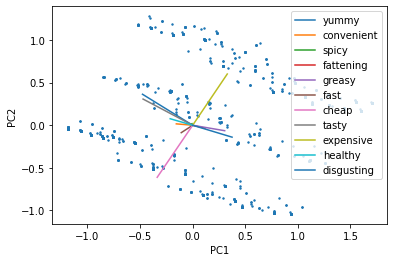

In [12]:
plt.scatter(plot_data[:,0],plot_data[:,1],s=2, marker='o')
for i in range(11):
    plt.plot([0,plot_components[0,i]],[0,plot_components[1,i]], label=binary_columnns[i])
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')